#### 다층 퍼셉트론
XOR 게이트 : 베타적 논리합
퍼셉트론 의사 알고리즘 : w1,w2,b를 구해 나가는 알고리즘 (and,or,nand 게이트중 하나 만들기)

#### 신경망
##### 활성화 함수

1. 계단함수
```python
def step_function(x):
    if x>0:
        return 1
    else:
        return 0
```
    하지만 x가 벡터로 입력되면 x>0부분에 문제가 생긴다.
```python
import numpy as np
x = np.array([-1.0, 0.0, 1.0])
y = x > 0
y

Out: array([False, False,  True])
```
따라서 y.astype(int)를 이용하여 넘파이 배열 y를 정수형으로 변환을 하여야 한다.

2. 시그모이드 함수

(-0.1, 1.1)

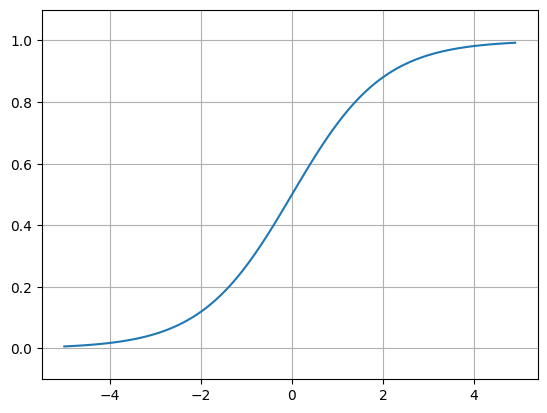

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.cla()
plt.plot(x,y)
plt.grid()
plt.ylim(-0.1,1.1)


(-6.0, 6.0)

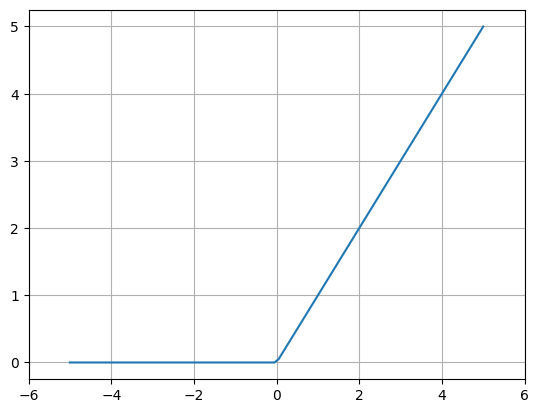

In [8]:
# relu 함수

def relu(x):
    return np.maximum(0,x)

plt.cla()
x = np.linspace(-5.0, 5.0, 100)
y = relu(x)
plt.grid()
plt.plot(x, y)
plt.xlim(-6.0, 6.0)


In [9]:
np.linspace(0,10,10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [12]:
A = np.arange(12).reshape(3,4)
B = np.arange(16).reshape(4,4)
print(np.dot(A, B))
print(A@B)

[[ 56  62  68  74]
 [152 174 196 218]
 [248 286 324 362]]
[[ 56  62  68  74]
 [152 174 196 218]
 [248 286 324 362]]


In [13]:
x = np.array([1,2]) # numpy 배열은 일차원이라 x.shape()는 (2,)이다. [[1,2]]의 shape가 (1,2)이다.
w = np.array([[1,3,5],[2,4,6]])
print('W=',w)
Y = np.dot(x,w)
print('Y=', Y)

W= [[1 3 5]
 [2 4 6]]
Y= [ 5 11 17]


#### 출력층 활성화 함수 

* 회귀에는 항등함수를, 두 그룹으로 분류하는 문제에는 시그모이드 함수를, 다중 클래스 분류에는 소프트맥스 함수를 사용합니다.

In [14]:
def identity_function(x):
  return x

def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3'] # 언패킹
  b1, b2, b3 = network['b1'], network['b2'], network['b3'] # 언패킹

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)
  return y

network = init_network() # network 타입 : dictionary
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


#### 소프트맥스 함수 : 각 노드 별 확률치

a1이 소프트맥스를 거치면 전체 중 a1만큼의 확률치

```python
def softmax_naive(x):
  exp_x = np.exp(x)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x
  return y
```
하지만, 데이터가 1000개 이상 되었을때는 $e^{1000}$은 inf를 반환하여 계산에 오류가 난다.
$e^{logC}=C$라는 로그 성질을 사용하여 식을 바꿔서 사용한다.

C' 을 ai중 가장 큰 값에 -를 붙이자. -> 항상 지수승이 음수가 나와 1보다 작아지고 overflow가 나올일이 없음 x1=1000이고 x2=1100이면 가장 큰 값은 1100이므로 $e^{ai-1100}$으로 $e^{-음수}$는 0과 1 사이의 값이 나와 계산 가능하다. 